In [24]:
import numpy as np 
import pandas as pd 

import os 

work_dir = os.path.dirname(os.getcwd())
df_dir = os.path.join(work_dir, 'df')
output_dir = os.path.join(work_dir, 'output')

In [30]:
df = pd.read_csv(os.path.join(output_dir, 'electoral_rolls_parsed_by_llm_output.csv'), header='infer', sep=';', encoding='utf-8')

In [31]:
df = df.iloc[:,:7]

In [32]:
print(df.head(10))
print("shape",df.shape)

     id    voter_id                     name        house_number   age  \
0  20.0  TNH3552262    Jtender Kumar Singh K                  46  66.0   
1   8.0  TNH3421906              Aslam Uddin                  18  28.0   
2  28.0  TNH3421898    Romij Uddin Choudhary                  18  32.0   
3   NaN  TNH2625077                   Suma B                17/B  34.0   
4   NaN  TNH2625085               Sharadamma                17 B  55.0   
5   NaN  TNH3874401           Kauser Fathima  No 14/2 ‘1st Floor  41.0   
6   NaN  TNH3518768             Huda Fathima                14/3  25.0   
7  23.0  TNH3508488   Mohammed Mahabubunnisa                14/2  43.0   
8   2.0  TNH3508496        Shaik Abdul Basha                14/2  46.0   
9   NaN  TNH3508470  Mohammed Ashraf Unnisa_                14/2  61.0   

   gender parent_or_spouse_name_only  
0    MALE             Rajkumar Singh  
1    MALE               Bodrul Hoque  
2    MALE         Junab Ali Choudary  
3  FEMALE       Late Vishnu B

Actual number of voters present in the pdf as mentioned in the pdf : 779 , 396 male and 383 female voters. 


In [36]:
# Analysis 1: df completeness (missing or null values)
missing_data = df.isnull().sum()

# Analysis 2: Basic statistical analysis for numerical fields like age
age_statistics = df['age'].describe()
print("missing df>>>")
print(missing_data)
print("\nage statistics")
print(age_statistics)
print('\ngender statistics')
# group by gender and show count
gender_statistics = df.groupby(['gender'])['voter_id'].count()
# gender_statistics = df['gender'].describe()
print(gender_statistics)


missing df>>>
id                            345
voter_id                        1
name                            0
house_number                    0
age                             1
gender                          1
parent_or_spouse_name_only      1
dtype: int64

age statistics
count    779.000000
mean      49.795892
std       17.533316
min       18.000000
25%       36.000000
50%       47.000000
75%       62.000000
max      103.000000
Name: age, dtype: float64

gender statistics
gender
FEMALE    382
MALE      396
Name: voter_id, dtype: int64


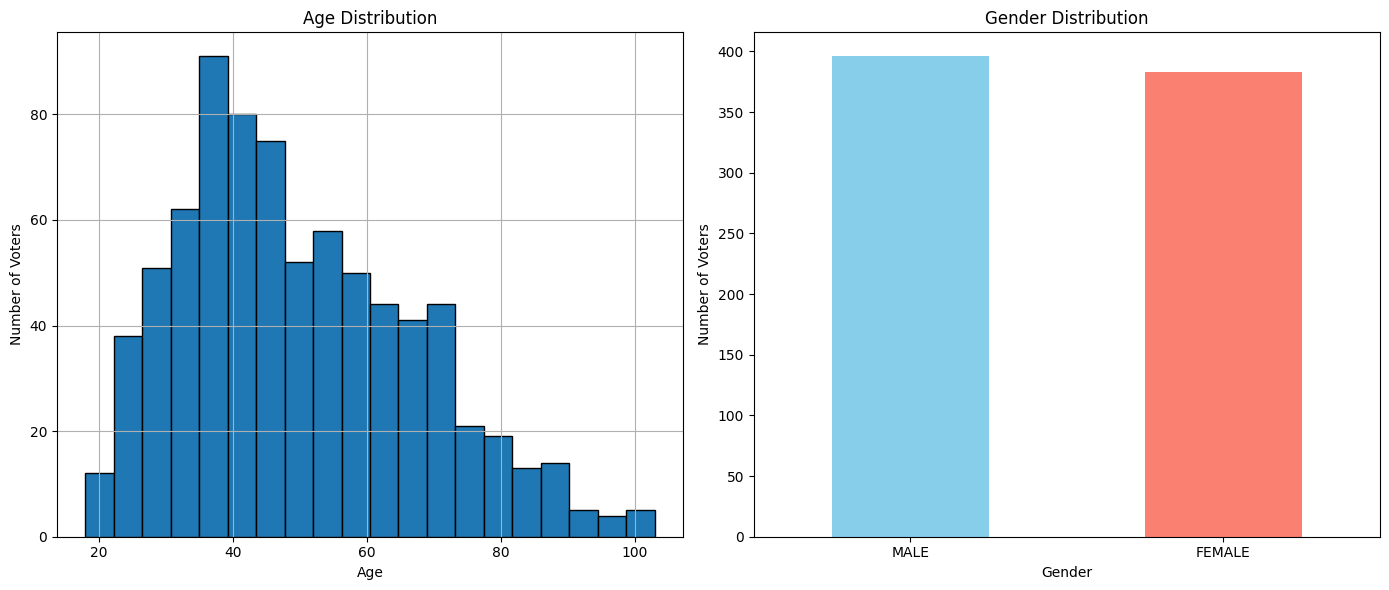

In [37]:
import matplotlib.pyplot as plt

# Analysis 3: Demographic analysis (Age and Gender distribution)
# Age distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Age Distribution')
df['age'].hist(bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Voters')

# Gender distribution
plt.subplot(1, 2, 2)
plt.title('Gender Distribution')
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Voters')
plt.xticks(rotation=0)  # keep the x-axis labels horizontal for better readability

plt.tight_layout()
plt.show()



In [38]:
# Analysis 4: Check for duplicate records in 'voter_id'
duplicate_voter_ids = df['voter_id'].duplicated().sum()
print("duplicate voter ids",duplicate_voter_ids)

df_ids = df.dropna(subset=['id'],axis = 0)
duplicate_ids = df['id'].duplicated().sum()
print("duplicate ids",duplicate_ids)



duplicate voter ids 1
duplicate ids 446


Out of total 779 voters, we have parsed 780 voters, showing 1 duplicate records. 

Gender classification is accurate as mentioned in the document there are 383 females and 396 males. 

While parsing ids due to irregular regex pattern, there are duplicates. 


Compared to regex, llm is performing better on uncertain data and pattern. 